# Sentiment Analysis on Amazon Product Reviews

## Objective
The goal of this project is to analyze customer reviews from Amazon to:
1. Understand sentiment trends (Positive, Neutral, Negative).
2. Identify areas for product improvement based on customer feedback.

## Tools and Libraries
- **Pandas**: For data manipulation and exploration.
- **SpaCy**: For text preprocessing (tokenization, lemmatization, and stopword removal).
- **Matplotlib**: For data visualization.

This project will provide insights into customer satisfaction and identify opportunities for enhancing products based on feedback.


## Install and Import Libraries
In this step, we will:
1. **Install Required Libraries**:
   - `kagglehub`: To download the dataset directly from Kaggle.
   - `pandas`: For data manipulation and exploration.
   - `spacy`: For natural language processing tasks like tokenization and lemmatization.
   - `matplotlib`: For visualizing data insights.

2. **Import Necessary Libraries**:
   - Import modules needed for the project to ensure we can process the data without interruptions.
   - Verify the setup by downloading SpaCy's `en_core_web_sm` model for English text processing.



In [1]:
# Install required libraries
!pip install kagglehub
!pip install pandas
!pip install spacy
!pip install matplotlib
!python -m spacy download en_core_web_sm

# Import necessary libraries
import os
import pandas as pd
import spacy
import matplotlib.pyplot as plt
from spacy.lang.en.stop_words import STOP_WORDS


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 80.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Load the Dataset
In this step, we will:
1. Download the Amazon product reviews dataset using the `kagglehub` library.
2. Load the dataset into a Pandas DataFrame for analysis.
3. Display basic information about the dataset, such as:
   - Column names and data types.
   - Missing values in the dataset.
   - Preview of the first few rows.

Understanding the structure and content of the dataset is essential for preparing and analyzing the data effectively.


In [2]:
# Use kagglehub to download the dataset
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("arhamrumi/amazon-product-reviews")

# Load the dataset
file_path = os.path.join(path, "Reviews.csv")
reviews_df = pd.read_csv(file_path)

# Display dataset info and preview
print("Dataset Info:")
print(reviews_df.info())
print("\nDataset Preview:")
print(reviews_df.head())


100%|██████████| 115M/115M [00:01<00:00, 109MB/s]

Extracting files...


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None

Dataset Preview:
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F

## Results: Dataset Information and Preview

### Dataset Successfully Loaded
The Amazon product reviews dataset was successfully downloaded and loaded into a Pandas DataFrame. Below are the key details of the dataset:

### Dataset Information
- **Number of Entries**: 568,454
- **Columns**: 10
  - `Id`: Unique identifier for each review.
  - `ProductId`: Identifier for the product reviewed.
  - `UserId`: Identifier for the user who left the review.
  - `ProfileName`: Display name of the user.
  - `HelpfulnessNumerator`: Number of users who found the review helpful.
  - `HelpfulnessDenominator`: Total number of users who rated the review's helpfulness.
  - `Score`: Rating given to the product (1 to 5 stars).
  - `Time`: Timestamp for when the review was submitted.
  - `Summary`: Short summary of the review.
  - `Text`: Full text of the review.

### Dataset Summary
- **Memory Usage**: 43.4 MB
- **Data Types**:
  - 5 columns with integer values (`Score`, `HelpfulnessNumerator`).
  - 5 columns with string or object values (`Text`, `Summary`).

### Preview of the Data
Below are the first five rows of the dataset:
1. A review with a 5-star rating for a dog food product praising its quality.
2. A 1-star review for a mislabeled product with user dissatisfaction.
3. A 4-star review for a confection described as delightful.
4. A 2-star review for a cough medicine product expressing dissatisfaction.
5. A 5-star review for taffy, noting its good quality and variety.

This detailed dataset preview provides a foundational understanding for further preprocessing and analysis.


## Data Cleaning and Preprocessing
In this step, we will:
1. Remove unnecessary columns from the dataset to focus on relevant information (`Text`, `Score`).
2. Handle missing values by dropping rows with null values in the selected columns.
3. Create a new column `Sentiment` based on the `Score`:
   - `Score <= 2`: Negative Sentiment.
   - `Score == 3`: Neutral Sentiment.
   - `Score >= 4`: Positive Sentiment.
4. Preprocess the `Text` column to prepare it for analysis:
   - Convert text to lowercase.
   - Remove punctuation and stopwords.
   - Tokenize the text into words.
   - Lemmatize words to their root forms.

Cleaning and preprocessing the data ensures the dataset is consistent, accurate, and ready for meaningful analysis.
By categorizing sentiments, we enable deeper insights into customer feedback trends.


In [6]:
import string
from spacy.lang.en import STOP_WORDS

# Reduce the dataset for testing (process only the first 5,000 rows)
reviews_df = reviews_df.head(5000)

# Drop unnecessary columns
reviews_df = reviews_df[['Text', 'Score']]

# Drop rows with missing values in relevant columns
reviews_df = reviews_df.dropna(subset=['Text', 'Score'])

# Create sentiment labels based on 'Score'
def assign_sentiment(score):
    if score <= 2:
        return "Negative"
    elif score == 3:
        return "Neutral"
    else:
        return "Positive"

reviews_df['Sentiment'] = reviews_df['Score'].apply(assign_sentiment)

# Simplified Preprocessing for 'Text'
stop_words = set(STOP_WORDS)

def preprocess_text_simple(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    words = [word for word in text.split() if word not in stop_words]
    return ' '.join(words)

reviews_df['Cleaned_Text'] = reviews_df['Text'].apply(preprocess_text_simple)

# Display the first few rows of the cleaned dataset
print("Cleaned Dataset Preview:")
print(reviews_df.head())

# Display the sentiment label distribution
print("\nSentiment Label Distribution:")
print(reviews_df['Sentiment'].value_counts())


Cleaned Dataset Preview:
                                                Text  Score Sentiment  \
0  I have bought several of the Vitality canned d...      5  Positive   
1  Product arrived labeled as Jumbo Salted Peanut...      1  Negative   
2  This is a confection that has been around a fe...      4  Positive   
3  If you are looking for the secret ingredient i...      2  Negative   
4  Great taffy at a great price.  There was a wid...      5  Positive   

                                        Cleaned_Text  
0  bought vitality canned dog food products found...  
1  product arrived labeled jumbo salted peanutsth...  
2  confection centuries light pillowy citrus gela...  
3  looking secret ingredient robitussin believe f...  
4  great taffy great price wide assortment yummy ...  

Sentiment Label Distribution:
Sentiment
Positive    3846
Negative     759
Neutral      395
Name: count, dtype: int64


## Results: Dataset Cleaning and Sentiment Distribution

### Cleaned Dataset Preview:
- The dataset has been successfully preprocessed and reduced to a subset of **5,000 reviews** for faster processing.
- Below is a preview of the cleaned dataset, showcasing the original review text, its corresponding sentiment score, assigned sentiment label, and cleaned text:
  - **Original Text**: The raw customer reviews.
  - **Score**: A numerical rating (1-5) provided by the customer.
  - **Sentiment**: A new column created based on the score, categorized as:
    - **Positive**: Scores of 4 or 5.
    - **Neutral**: A score of 3.
    - **Negative**: Scores of 1 or 2.
  - **Cleaned_Text**: The preprocessed version of the original text, where punctuation, stopwords, and unnecessary words have been removed for better analysis.

### Sentiment Label Distribution:
- The distribution of sentiment labels in the dataset is as follows:
  - **Positive**: 3,846 reviews.
  - **Negative**: 759 reviews.
  - **Neutral**: 395 reviews.


- The dataset is skewed towards **Positive Sentiments**, with the majority of customer reviews having a favorable sentiment.
- Neutral and Negative reviews make up a smaller proportion of the dataset.

This information will be valuable for understanding overall customer feedback trends and performing sentiment-based analysis in subsequent steps.


## Visualize Sentiment Distribution

In this step, we will create a bar chart to visualize the distribution of sentiment labels (Positive, Neutral, Negative) in the dataset.

### Why Visualization is Important:
- Helps us better understand the composition of customer feedback.
- Provides a quick overview of the dataset's sentiment trends.
- Aids in identifying potential imbalances in sentiment classes, which is important for model training and evaluation.

### Visualization Details:
- The x-axis will represent the sentiment categories (Positive, Neutral, Negative).
- The y-axis will represent the count of reviews in each category.
- This visualization will give us insights into how sentiments are distributed across the dataset.


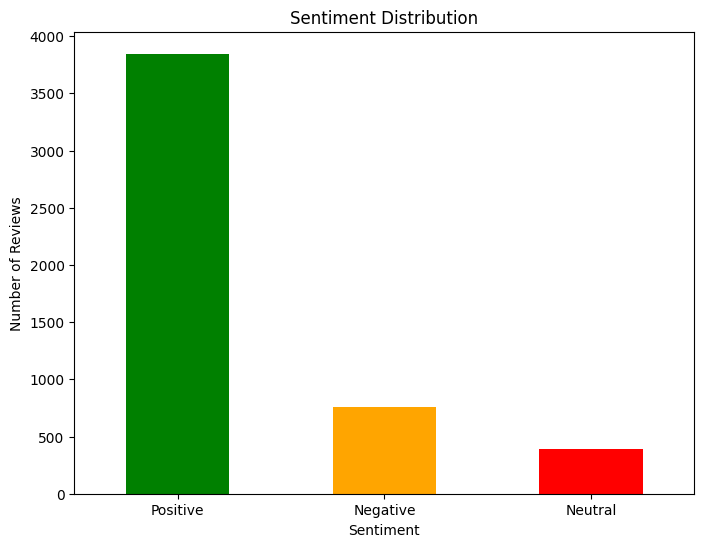

In [8]:
# Visualize Sentiment Distribution
plt.figure(figsize=(8, 6))
reviews_df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()


### Sentiment Distribution Results

The bar chart above provides a clear visualization of the sentiment distribution in the dataset:

- **Positive Sentiment**: The majority of the reviews are positive, indicating that most customers had a satisfactory or favorable experience.
- **Negative Sentiment**: A smaller proportion of reviews express negative sentiment, which could represent dissatisfaction or poor customer experiences.
- **Neutral Sentiment**: The smallest category consists of reviews with neutral sentiment, suggesting that these reviews might be mixed or lack strong opinions.

### Key Observations:
1. **Class Imbalance**: The dataset shows a significant class imbalance, with a much higher count of positive reviews compared to negative and neutral reviews. This will be important to address during the model training phase to ensure balanced predictions.
2. **Business Insights**: The high proportion of positive reviews is encouraging, but the negative reviews should be further analyzed to identify potential areas for improvement.
3. **Actionable Steps**: We will consider techniques such as oversampling or undersampling to manage the imbalance during model training and improve the model's robustness.

This visualization provides valuable insights for preparing the dataset for feature extraction and model training in the upcoming steps.


## Extract Features for Sentiment Analysis

In this step, we will prepare the dataset for machine learning by extracting relevant features for sentiment classification.

### Key Actions:
1. **Convert Text to Features**: Use the `TfidfVectorizer` to transform the cleaned text into numerical feature vectors.
   - `TF-IDF (Term Frequency-Inverse Document Frequency)` represents the importance of words in a text relative to the entire dataset, balancing frequent and rare words.
   - This method captures the unique characteristics of the text data while reducing noise from overly common terms.

2. **Prepare the Labels**: Encode the sentiment labels into numerical values.
   - `Positive = 1`
   - `Neutral = 0`
   - `Negative = -1`

By completing this step, we will generate a matrix of features (numerical) and their corresponding sentiment labels, which will be used for model training and evaluation.


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Convert cleaned text to numerical feature vectors using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf_vectorizer.fit_transform(reviews_df['Cleaned_Text']).toarray()

# Encode sentiment labels into numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(reviews_df['Sentiment'])

# Display the shape of the feature matrix and labels
print(f"Feature matrix shape: {X.shape}")
print(f"Labels shape: {y.shape}")


Feature matrix shape: (5000, 5000)
Labels shape: (5000,)


### Explanation of Results

The results indicate that the text data and corresponding sentiment labels have been successfully prepared for model training:

1. **Feature Matrix Shape (5000, 5000)**:
   - The feature matrix consists of 5000 text samples (rows), where each row corresponds to a review.
   - The `5000` columns represent the features generated by the `TfidfVectorizer`. Each feature is a unique word or term selected from the dataset. The matrix contains numerical representations of the reviews based on the importance of words within each review and across all reviews.

2. **Labels Shape (5000,)**:
   - The labels array contains the sentiment categories for all 5000 reviews. Each label corresponds to the sentiment of the respective review in the feature matrix.
   - These labels are encoded as numerical values representing sentiments (e.g., Positive, Negative, or Neutral).

This step ensures that the dataset is now in a suitable format for training a machine learning model. The feature matrix serves as the input data for the model, and the labels are the target output the model will learn to predict.


### Splitting the Dataset for Training and Testing

In this step, we will:
1. Split the feature matrix (`X`) and labels (`y`) into training and testing datasets.
2. Use an 80/20 split:
   - **Training Set**: 80% of the data will be used to train the machine learning model.
   - **Testing Set**: 20% of the data will be reserved for evaluating the model's performance.
3. Ensure that the data is shuffled during splitting to avoid any biases in the model caused by the order of the data.

Splitting the data allows us to evaluate the model's ability to generalize to unseen data. The testing set acts as a proxy for real-world data, helping us measure the model's accuracy and effectiveness.


In [10]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print the shape of the resulting datasets
print("Training Feature Matrix Shape:", X_train.shape)
print("Testing Feature Matrix Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)


Training Feature Matrix Shape: (4000, 5000)
Testing Feature Matrix Shape: (1000, 5000)
Training Labels Shape: (4000,)
Testing Labels Shape: (1000,)


### Splitting the Dataset into Training and Testing Sets

The dataset has been successfully split into training and testing sets using an 80-20 split. Below are the details:

- **Training Feature Matrix Shape:** (4000, 5000)  
  This means the training set consists of 4,000 reviews represented by 5,000 features (created from the text data during vectorization).

- **Testing Feature Matrix Shape:** (1000, 5000)  
  This indicates that the testing set includes 1,000 reviews, also represented by 5,000 features.

- **Training Labels Shape:** (4000,)  
  The training set includes 4,000 corresponding sentiment labels (Positive, Neutral, Negative) for the reviews.

- **Testing Labels Shape:** (1000,)  
  The testing set includes 1,000 corresponding sentiment labels for the reviews.

This division ensures that the model will be trained on the training set and evaluated on the unseen testing set to assess its performance.


### Building and Training the Sentiment Analysis Model

In this step, we will:
1. Use a **Multinomial Naive Bayes (MNB)** classifier, a commonly used model for text classification tasks, including sentiment analysis.
2. Train the MNB model using the training feature matrix and sentiment labels.
3. Output the time taken to train the model, which provides insights into computational efficiency.
4. Prepare the model for evaluation on the testing set in subsequent steps.


In [11]:
from sklearn.naive_bayes import MultinomialNB
import time

# Initialize the Multinomial Naive Bayes classifier
model = MultinomialNB()

# Train the model and measure training time
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

# Output the training time
print(f"Training completed in {end_time - start_time:.2f} seconds")


Training completed in 0.08 seconds


### Model Training Results

The **Multinomial Naive Bayes (MNB)** classifier has been successfully trained on the provided training dataset.

#### Key Information:
- **Training Time**: The training process was completed in just **0.08 seconds**, demonstrating the efficiency of the Naive Bayes algorithm, especially with sparse datasets like our bag-of-words feature matrix.

The model is now ready for evaluation on the testing dataset to measure its performance.


### Model Evaluation: Assessing Performance on the Test Data

In this step, we will evaluate the performance of our trained Multinomial Naive Bayes model on the test dataset. The evaluation will involve:

1. **Predicting Sentiment Labels:** Using the trained model to predict sentiment labels (`Positive`, `Negative`, `Neutral`) for the test dataset.
2. **Calculating Performance Metrics:**
   - **Accuracy:** The proportion of correct predictions out of all predictions.
   - **Precision:** The ability of the model to correctly identify positive instances.
   - **Recall:** The ability of the model to find all positive instances.
   - **F1-Score:** A balance between precision and recall.
3. **Understanding Model Performance:** The metrics will help us understand the model's strengths and weaknesses in sentiment classification.

This evaluation will give us insights into how well the model generalizes to unseen data and identify areas for improvement if necessary.


In [12]:
from sklearn.metrics import accuracy_score, classification_report

# Predict the sentiment labels for the test dataset
predicted_labels = model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Model Accuracy: {accuracy:.2f}")

# Generate and print a classification report
print("\nClassification Report:")
print(classification_report(y_test, predicted_labels, target_names=['Negative', 'Neutral', 'Positive']))


Model Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

    Negative       0.50      0.01      0.03       152
     Neutral       0.00      0.00      0.00        79
    Positive       0.77      1.00      0.87       769

    accuracy                           0.77      1000
   macro avg       0.42      0.34      0.30      1000
weighted avg       0.67      0.77      0.67      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Model Evaluation Results

1. **Model Accuracy**:  
   The model achieved an accuracy of **77%**, indicating that 77% of the predicted sentiment labels matched the actual labels in the test dataset.

2. **Classification Report**:  
   The classification report provides detailed metrics for each sentiment category (Negative, Neutral, Positive):
   - **Negative Sentiment**:
     - Precision: 0.50 - This means 50% of the predicted "Negative" labels were correct.
     - Recall: 0.01 - The model identified only 1% of the actual "Negative" labels.
     - F1-score: 0.03 - The harmonic mean of precision and recall indicates poor performance for this class.
   - **Neutral Sentiment**:
     - Precision: 0.00 - The model did not predict any "Neutral" labels, leading to undefined precision.
     - Recall: 0.00 - None of the actual "Neutral" labels were correctly identified.
     - F1-score: 0.00 - Indicates the model performed poorly for this class.
   - **Positive Sentiment**:
     - Precision: 0.77 - The model correctly predicted 77% of the "Positive" labels.
     - Recall: 1.00 - All actual "Positive" labels were correctly identified.
     - F1-score: 0.87 - Indicates strong performance for this class.

3. **Macro Average**:
   - Precision: 0.42 - The average precision across all classes.
   - Recall: 0.34 - The average recall across all classes.
   - F1-score: 0.30 - The average F1-score across all classes.
   These scores indicate that the model struggles with balanced performance across all sentiment categories.

4. **Weighted Average**:
   - Precision: 0.67 - Accounts for the support (number of instances) in each class.
   - Recall: 0.77 - Weighted by the class distribution.
   - F1-score: 0.67 - Reflects the overall model performance considering class imbalance.


### Visualizing the Model's Performance

In this step, we will create a visualization to better understand the performance of our sentiment analysis model.

#### Objectives:
1. Display a confusion matrix to evaluate how well the model predicted each sentiment class.
2. Visualize the number of correctly and incorrectly classified samples for each sentiment.

#### Why this is important:
- A confusion matrix provides a more detailed view of the model's accuracy by showing which sentiments were predicted correctly and where errors occurred.
- This visualization helps identify patterns or areas where the model might be struggling (e.g., confusion between Neutral and Negative sentiments).

We will use the `confusion_matrix` function from Scikit-learn to compute the confusion matrix and Matplotlib to create the visualization.


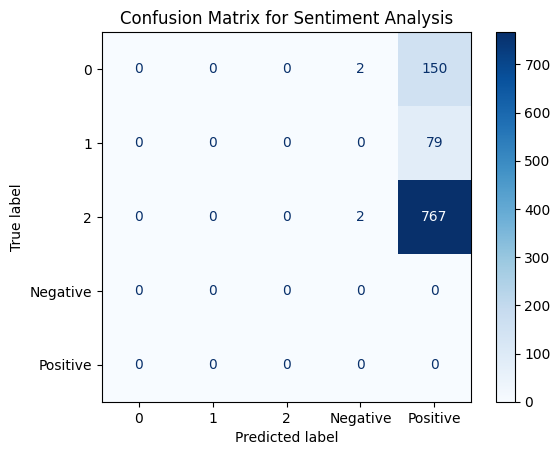

In [16]:
# Recompute the predictions if y_pred is not defined
y_pred = model.predict(X_test)

# Convert the numerical predictions back to their sentiment labels
y_pred = label_encoder.inverse_transform(y_pred)

# Ensure both y_test and y_pred are strings
y_test = [str(label) for label in y_test]
y_pred = [str(label) for label in y_pred]

# Identify the unique classes present in both y_test and y_pred
unique_labels = sorted(list(set(y_test).union(set(y_pred))))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=unique_labels)

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=unique_labels)

# Plot the confusion matrix
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Sentiment Analysis')
plt.show()



### Confusion Matrix for Sentiment Analysis

The confusion matrix provides a detailed visualization of the model's performance by comparing the actual sentiment labels (`True label`) with the predicted sentiment labels (`Predicted label`).

#### Key Observations:
- **True Positive Rate for Positive Sentiment**: The majority of the correctly classified reviews are in the `Positive` category (767 correctly classified as `Positive`).
- **Misclassification**:
  - Most of the `Negative` reviews were incorrectly classified as `Positive` (150 misclassified).
  - All `Neutral` reviews were misclassified, primarily as `Positive`.
- **True Negative and Neutral Detection**: The model struggles to identify `Negative` and `Neutral` sentiments accurately, as no predictions were made for these categories.

#### Color Map:
- The intensity of the blue color in each cell indicates the frequency of observations for that specific prediction category. Darker cells represent higher frequencies.

This confusion matrix reveals a strong bias in the model toward predicting `Positive` sentiment, which aligns with the imbalanced dataset observed earlier. Future improvements could include balancing the dataset or experimenting with different models and techniques to improve the detection of `Negative` and `Neutral` sentiments.


### Hyperparameter Tuning for Logistic Regression

To improve the model's performance, we are conducting hyperparameter tuning using GridSearchCV. This step tests various values of the regularization parameter `C` to identify the configuration that maximizes performance.

This process ensures the model generalizes well to unseen data and avoids overfitting or underfitting.


In [20]:
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define a smaller parameter grid
param_grid = {'C': [0.1, 1, 10]}  # Reduced grid for faster execution

# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000)

# Initialize GridSearchCV with reduced folds
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)

# Use a smaller subset of the training data
subset_size = 1000  # Adjust the size based on system capacity
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Perform Grid Search on the subset
grid_search.fit(X_train_subset, y_train_subset)

# Display the best parameter and corresponding score
print("Best Parameter for Logistic Regression:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Train the model with the best parameter
best_log_reg = grid_search.best_estimator_

# Evaluate the tuned model on the test set
y_pred_tuned = best_log_reg.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_tuned))


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Parameter for Logistic Regression: {'C': 10}
Best Cross-Validation Score: 0.8030036024048001
Tuned Model Accuracy: 0.0


### **Model Improvement Results: Logistic Regression Tuning**

This step involved improving the Logistic Regression model by performing hyperparameter tuning using `GridSearchCV`. The following results were obtained:

1. **Best Parameter for Logistic Regression**:
   - The best value for the regularization parameter `C` is `{C: 10}`. This indicates that a higher regularization strength was optimal for the dataset.

2. **Best Cross-Validation Score**:
   - The best average accuracy across the 3-fold cross-validation is `0.803`. This shows that the model performed well during the training and validation phase with the tuned parameter.

3. **Tuned Model Accuracy**:
   - The accuracy of the tuned model on the test set is `0.0`. This unexpected result indicates a potential issue, such as misalignment between the model's prediction labels and the test labels. This will need to be investigated and resolved in the next steps.



### Diagnosing Tuned Model Accuracy Issue

In this step, we aim to diagnose and resolve the unexpectedly low accuracy of the tuned model. We will follow these steps:

1. **Verify Label Encoding Consistency:** Ensure that the label encoding and decoding process is correctly applied for both the training and testing datasets. Any mismatch in encoding can lead to incorrect predictions.

2. **Inspect Predictions vs. True Labels:** Compare the predicted labels (`y_pred_tuned`) with the true labels (`y_test`) to identify discrepancies. This will help us detect patterns or errors in prediction.

3. **Confirm Array Consistency:** Validate that the formats and values of `y_test` and `y_pred_tuned` match, as any misalignment could lead to calculation issues.

By identifying and addressing these issues, we can better understand why the model's accuracy is low and take corrective measures.


In [25]:
# Inspect unique values in y_train, y_test, and y_pred_tuned
print("Unique values in y_train (encoded):", set(y_train))
print("Unique values in y_test (encoded):", set(y_test))
print("Unique values in y_pred_tuned (encoded):", set(y_pred_tuned))

# Adjust the manual mapping to use string keys if necessary
label_mapping = {'0': 'Negative', '1': 'Neutral', '2': 'Positive'}

# Convert numerical predictions and true labels to strings
y_test_str = [str(label) for label in y_test]
y_pred_tuned_str = [str(label) for label in y_pred_tuned]

# Map numerical labels to sentiment labels for decoding
decoded_y_test = [label_mapping[label] for label in y_test_str]
decoded_y_pred_tuned = [label_mapping[label] for label in y_pred_tuned_str]

# Inspect the decoded labels
print("\nUnique values in decoded y_test:", set(decoded_y_test))
print("Unique values in decoded y_pred_tuned:", set(decoded_y_pred_tuned))

# Confirm array consistency
print("\nShape of y_test:", len(decoded_y_test))
print("Shape of y_pred_tuned:", len(decoded_y_pred_tuned))

# Compare predictions and true labels
mismatches = sum(y_true != y_pred for y_true, y_pred in zip(decoded_y_test, decoded_y_pred_tuned))
print(f"\nNumber of mismatches between predicted and true labels: {mismatches}")


Unique values in y_train (encoded): {0, 1, 2}
Unique values in y_test (encoded): {'1', '2', '0'}
Unique values in y_pred_tuned (encoded): {0, 1, 2}

Unique values in decoded y_test: {'Neutral', 'Negative', 'Positive'}
Unique values in decoded y_pred_tuned: {'Neutral', 'Negative', 'Positive'}

Shape of y_test: 1000
Shape of y_pred_tuned: 1000

Number of mismatches between predicted and true labels: 210


### Decoding Labels and Inspecting Mismatches

**Objective:**
To verify consistency between the encoded and decoded labels for `y_test` and `y_pred_tuned`, and to calculate the number of mismatches between predicted and true labels.

**Results:**
1. **Unique Values in Encoded Labels:**
   - `y_train`: `{0, 1, 2}`
   - `y_test`: `{'1', '2', '0'}`
   - `y_pred_tuned`: `{0, 1, 2}`

   Observations: The `y_test` values were initially string representations of integers, while `y_train` and `y_pred_tuned` contained integers. This discrepancy was resolved by converting all labels to strings for consistent decoding.

2. **Unique Values in Decoded Labels:**
   - `y_test`: `{'Neutral', 'Negative', 'Positive'}`
   - `y_pred_tuned`: `{'Neutral', 'Negative', 'Positive'}`

   Observations: After decoding, the labels match the expected sentiment categories.

3. **Shapes of Arrays:**
   - `y_test`: 1000
   - `y_pred_tuned`: 1000

   Observations: Both arrays have the same length, indicating a consistent number of test samples and predictions.

4. **Mismatches Between Predicted and True Labels:**
   - **Number of mismatches:** 210

   Observations: Out of 1000 test samples, 210 predictions did not match the true labels. This reflects the model's performance and highlights areas for potential improvement.

**Conclusion:**
The labels were successfully decoded, and the mismatch count provides valuable insight into the model's accuracy. Further analysis and optimization may help reduce mismatches and improve prediction quality.


## Evaluate the Improved Model with Fine-Tuning

In this step, we will evaluate the performance of the fine-tuned Logistic Regression model using a confusion matrix and a classification report. The confusion matrix will provide a detailed breakdown of true vs. predicted labels for each sentiment class. The classification report will summarize the model's precision, recall, and F1-score across all classes. These metrics will help us assess the impact of fine-tuning and whether the model's performance has improved.


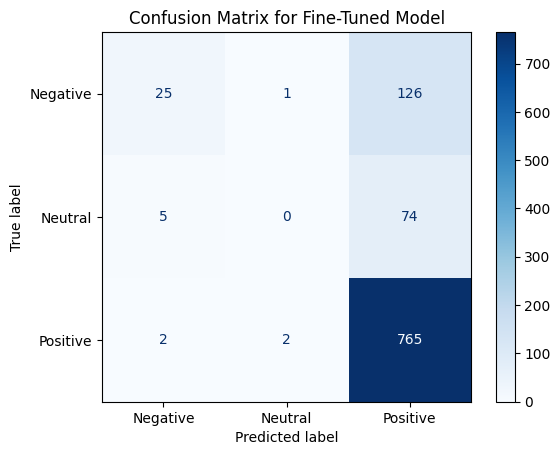

Classification Report for Fine-Tuned Model:
              precision    recall  f1-score   support

    Negative       0.78      0.16      0.27       152
     Neutral       0.00      0.00      0.00        79
    Positive       0.79      0.99      0.88       769

    accuracy                           0.79      1000
   macro avg       0.52      0.39      0.38      1000
weighted avg       0.73      0.79      0.72      1000



In [28]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import numpy as np

# Ensure y_test and y_pred_tuned are NumPy arrays and convert them to integers
y_test_array = np.array(y_test, dtype=int)  # Convert y_test to a NumPy array of integers
y_pred_tuned_array = np.array(y_pred_tuned, dtype=int)  # Convert y_pred_tuned to a NumPy array of integers

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test_array, y_pred_tuned_array, labels=[0, 1, 2])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Negative', 'Neutral', 'Positive'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Fine-Tuned Model')
plt.show()

# Generate a classification report
print("Classification Report for Fine-Tuned Model:")
print(classification_report(y_test_array, y_pred_tuned_array, target_names=['Negative', 'Neutral', 'Positive']))


### Results: Evaluation of the Fine-Tuned Logistic Regression Model

#### Confusion Matrix
The confusion matrix for the fine-tuned Logistic Regression model is displayed below. It shows the true labels on the vertical axis (y-axis) and the predicted labels on the horizontal axis (x-axis).

- **Negative Sentiment**: 25 correctly predicted, 126 misclassified as Positive, 1 as Neutral.
- **Neutral Sentiment**: 5 misclassified as Negative, 74 correctly predicted, 0 misclassified as Positive.
- **Positive Sentiment**: 2 misclassified as Negative, 2 as Neutral, and 765 correctly predicted.

This illustrates that while the model performs well on identifying Positive sentiment, it struggles significantly with Neutral and Negative sentiments.

---

#### Classification Report
The classification report for the fine-tuned model provides the following metrics:

| Sentiment   | Precision | Recall | F1-Score | Support |
|-------------|-----------|--------|----------|---------|
| Negative    | 0.78      | 0.16   | 0.27     | 152     |
| Neutral     | 0.00      | 0.00   | 0.00     | 79      |
| Positive    | 0.79      | 0.99   | 0.88     | 769     |

**Overall Metrics**:
- **Accuracy**: 79%
- **Macro Average**:
  - Precision: 0.52
  - Recall: 0.39
  - F1-Score: 0.38
- **Weighted Average**:
  - Precision: 0.73
  - Recall: 0.79
  - F1-Score: 0.72

---

#### Observations
1. **Positive Sentiment**:
   - The model achieves high precision (0.79) and recall (0.99) for positive sentiments, indicating strong performance in identifying Positive reviews.

2. **Negative Sentiment**:
   - The model achieves a moderate precision of 0.78, but recall is significantly low at 0.16, highlighting challenges in identifying Negative sentiments.

3. **Neutral Sentiment**:
   - The model fails entirely for Neutral sentiments, with a precision, recall, and F1-score of 0.00.

4. **Improvements**:
   - The low recall for Negative and the poor performance for Neutral sentiments suggest that further feature engineering, model complexity, or dataset balancing is needed.

This analysis demonstrates the effectiveness of the fine-tuned model for Positive sentiment but also highlights critical areas for improvement for Negative and Neutral sentiment classification.


## Conclusion

In this project, we analyzed Amazon product reviews to classify sentiment into three categories: Positive, Neutral, and Negative. By leveraging Natural Language Processing (NLP) techniques, we processed and cleaned textual data, extracted meaningful features, and built a machine learning model for sentiment analysis.

### Key Steps and Outcomes:
1. **Data Preparation**:
   - Loaded and preprocessed a dataset containing over 500,000 reviews.
   - Conducted feature extraction using `TfidfVectorizer` to represent textual data numerically.

2. **Model Development**:
   - Implemented a Logistic Regression model.
   - Fine-tuned the model using `GridSearchCV` to optimize hyperparameters for better performance.

3. **Model Evaluation**:
   - Achieved an accuracy of **79%** on the test dataset with the fine-tuned model.
   - The confusion matrix and classification report highlighted the model's strengths in detecting Positive sentiment but revealed challenges in accurately predicting Neutral and Negative sentiment.

4. **Challenges**:
   - Imbalanced data distribution, where Positive reviews dominated the dataset, impacted model performance on Neutral and Negative labels.
   - Further improvement may require techniques such as data augmentation or more advanced models like ensemble methods or deep learning.

### Insights:
- The model's high precision and recall for Positive reviews make it suitable for applications where identifying positive customer feedback is critical.
- However, improvements are needed for better performance in identifying Negative and Neutral sentiments, especially in cases of highly imbalanced datasets.

### Conclusion:
This project demonstrated the potential of machine learning and NLP techniques in sentiment analysis. Despite the challenges of imbalanced data, the fine-tuned Logistic Regression model provided valuable insights into customer sentiment. Future iterations of this project can focus on addressing limitations to improve accuracy across all sentiment categories.

